In [1]:
!pip install -q sentence-transformers chromadb gdown matplotlib pillow numpy

In [2]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer

c:\Users\ravin\anaconda3\envs\ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# !gdown 1q3dpti5aX4LdD3Mq7bZ4rjTeZbQEljiy  # Uncomment if not downloaded

In [4]:
image_folder = 'image_dataset'
image_files = glob(os.path.join(image_folder, '*.jpg'))

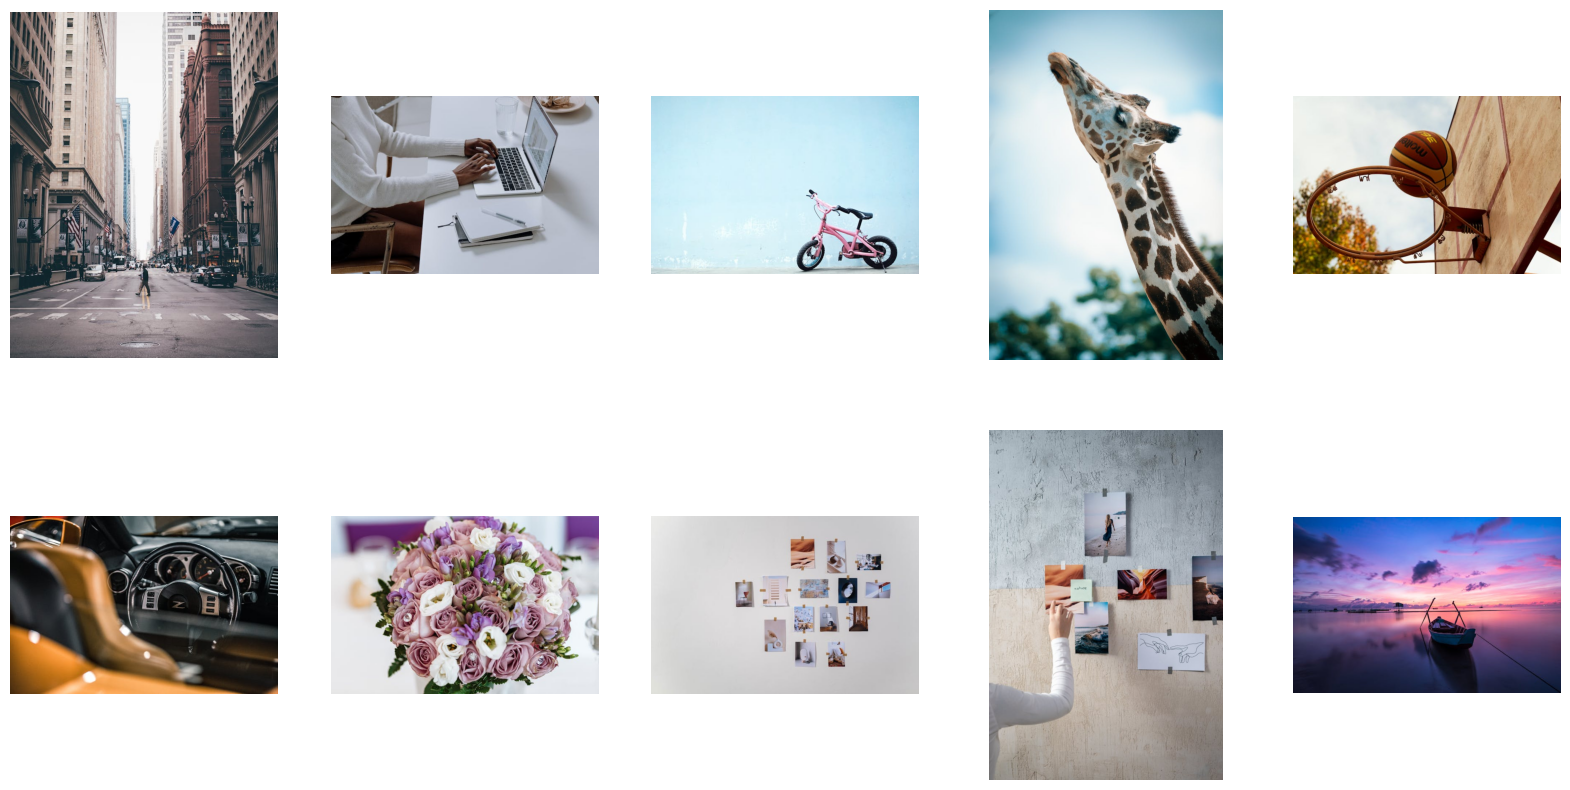

In [5]:
# Display 10 Random Images
random.seed(42)
selected_images = random.sample(image_files, 10)
plt.figure(figsize=(20, 10))
for i, image_path in enumerate(selected_images):
    img = Image.open(image_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [6]:
def generate_clip_embeddings(images_path, model):
    image_paths = glob(os.path.join(images_path, '**/*.jpg'), recursive=True)
    embeddings = []
    for img_path in image_paths:
        image = Image.open(img_path).convert("RGB")
        embedding = model.encode(image)
        embeddings.append(embedding)
    return embeddings, image_paths


IMAGES_PATH = 'image_dataset'
model = SentenceTransformer('clip-ViT-B-32')
embeddings, image_paths = generate_clip_embeddings(IMAGES_PATH, model)

In [7]:
chroma_client = chromadb.PersistentClient(path='./vectordb')

collection = chroma_client.get_or_create_collection(name='image_collection') # use default embedding

# Convert NumPy arrays to lists for ChromaDB
embedding_list = [embedding.tolist() for embedding in embeddings]

# Add embeddings with image paths as documents
collection.add(
    documents=image_paths,
    embeddings=embedding_list,
    ids=[str(i) for i in range(len(embedding_list))]
)

print("Embeddings stored in ChromaDB and persisted.")

Embeddings stored in ChromaDB and persisted.


In [8]:
def retrieve_similar_images(query_image_path, model, collection, top_k=3):
    query_image = Image.open(query_image_path).convert("RGB")
    query_embedding = model.encode(query_image).tolist()

    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_k
    )
    retrieved_images = results['documents'][0]
    return query_image, retrieved_images

In [9]:
def visualize_results(query, retrieved_images):
    plt.figure(figsize=(12, 5))

    # Query Image
    plt.subplot(1, len(retrieved_images) + 1, 1)
    plt.imshow(query)
    plt.title("Query Image")
    plt.axis('off')

    # Retrieved Matches
    for i, img_path in enumerate(retrieved_images):
        plt.subplot(1, len(retrieved_images) + 1, i + 2)
        plt.imshow(Image.open(img_path))
        plt.title(f"Match {i + 1}")
        plt.axis('off')

    plt.show()

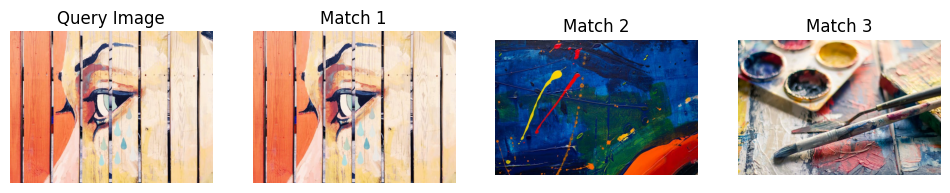

In [10]:
query = 'image_dataset/pexels-w-w-299285-889839.jpg'
query_image, retrieved_images = retrieve_similar_images(query, model, collection, top_k=3)
visualize_results(query_image, retrieved_images)

In [11]:
chroma_client = chromadb.PersistentClient(path='./vectordb')
collection = chroma_client.get_or_create_collection(name='image_collection')
print("ChromaDB collection loaded successfully.")

ChromaDB collection loaded successfully.


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ravin\AppData\Local\Temp\ipykernel_7460\3401449822.py:1: SyntaxWarning: invalid escape sequence '\p'
  query_image_path = 'image_dataset\pexels-bananamade-2762942.jpg'  # Example query image path


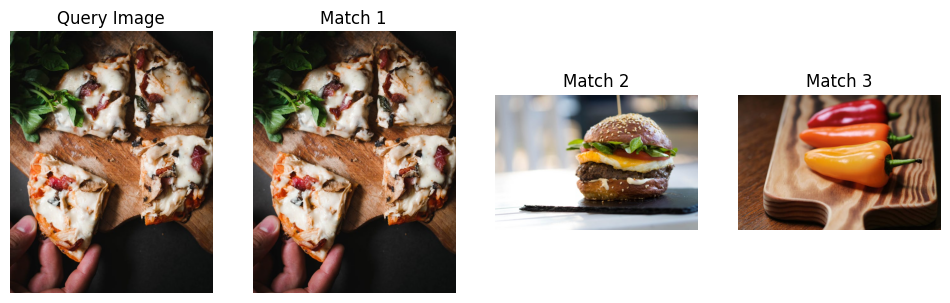

In [13]:
query_image_path = 'image_dataset\pexels-bananamade-2762942.jpg'  # Example query image path
query_image, retrieved_images = retrieve_similar_images(query_image_path, model, collection, top_k=3)
visualize_results(query_image, retrieved_images)
